本文参考海通证券2011年6月10日《统计套利之股票配对交易策略》

### 配对交易介绍
配对交易（Paris Trading）是统计套利策略的一种，它寻找同一行业中股价具备均衡关系的两家上市公司，做空近期相对强势的股票，同时做多相对弱势股，以期两者股价重返均衡值时，平仓赚取两只股票价差变动的收益。

配对交易（Pairs Trading）的理念最早来源于上世纪20年代华尔街传奇交易员Jesse Livermore 的姐妹股票对（sister stocks）交易策略。他首先在同一行业内选取业务相似，股价具备一定均衡关系的上市公司股票，然后做空近期的相对强势股，同时做多相对弱势股，等两者股价又回复均衡时，平掉所有仓位，了结交易。该策略与传统股票交易最大的不同之处在于，它的投资标的是两只股票的价差，是一种相对价值而非绝对价值。同时又由于它在股票多头和空头方同时建仓，对冲掉了绝大部分市场风险，因而它又是一种市场中性（Market Neutral）策略，策略收益和大盘走势的相关性很低。

1985年，Morgan Stanley公司成立了一支由Dr. Tartaglia 领导的量化团队，专门开展配对交易的研究，并于1987年投入实战，当年实现盈利5000万美元。不过该策略在之后两年连续亏损，研究团队被迫解散，小组成员散落到各家对冲基金，策略的思想也随之广为市场知晓。经过多年学术机构的研究和市场机构的实战，配对交易的理论框架和配套交易系统都日臻完善。

### 实例展示
配对交易的第一步是选取适合配对的两只股票，我们以美的电器和青岛海尔两家公司为例，绘制两家公司从2010年1月到2010年12月的价格走势以及他们的相对强弱系数，其中相对强弱系数=美的电器股价/青岛海尔股价。

![1.png][1]

上图可以大致观察他们的走势，可以看到两家公司的股价走势基本保持一致，相对强弱指数围绕着均值上下波动。如果我们把相对强弱指数做一定的数学处理，即得到他们的价差。

$$
s_t=log(P_t^A)-\beta log(P_t^B)
$$
其中$ \beta $为$log(P_t^A)$关于$log(P_t^B)$回归得到的系数

然后对$s_t$进行标准化处理：$s_t=(s_t-mean(s_t))/std(s_t)$

即得到价差，不难理解，价差代表了两个价格走势趋同函数直接的价格偏离情况，如果价格偏离过大，则他们价格走势有回归的趋势，可以从中套利。

我们来观察一下美的集团与青岛海尔的价差走势：

![2.png][2]

基于前文的交易策略思路，我们构造的策略是，先选取价差阙值，我们这里选取的是1.5，当价差大于1.5时，我们做空1单位的美的集团，同时买入$\beta$单位的青岛海尔，其中$\beta$为$log(P_t^{美的})$关于$log(P_t^{海尔})$回归得到的系数。同理当价差小于-1.5时，我们买入1单位的美的集团，融券卖出$\beta$单位的青岛海尔。当价差经过0轴时进行平仓。以此构造的策略组合净值走势如下：

![3.png][3]

走势较为平稳，回撤控制在一定范围。在后面的文章，我们还会进一步构造多只股票配对策略，来观察策略的收益情况。

在这里需要提醒一个问题，有的公司在一定时间范围内价格走势与他的配对公司走势相似，但是随着公司基本面发生实质变化等原因，此时他们的走势不再趋同，此时需要选取另外的股票与他们进行配对交易。如五粮液与泸州老窖的例子：

![4.png][4]

由图我们可以看到，在红色虚线右边，价差不再围绕0轴震动，而是呈现单边走势，此时不再适合采用配对交易策略。

  [1]: https://image.joinquant.com/76bad40c49b72fe174887c77dd82d7a7
  [2]: https://image.joinquant.com/868c306a33df5f713a72e7d6ae1123bc
  [3]: https://image.joinquant.com/1a81c8babef71495c5ef32e54d9973b7
  [4]: https://image.joinquant.com/24eefef9bc649d620d0c1d071c72976c

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import tushare as ts

In [2]:
##获取美的集团，青岛海尔价格以及相对强弱系数=P1/P2
price=get_price(['000527.XSHE','600690.XSHG'],start_date='2010-01-01',end_date='2010-12-31',fields='close')['close']
xdqr=price['000527.XSHE']/price['600690.XSHG']

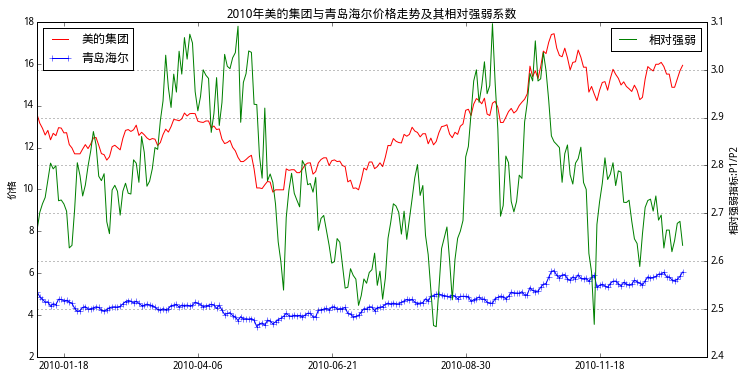

In [6]:
##绘制价格以及相对强弱系数走势 
fig = plt.figure(figsize=(12,6))  
ax1 = fig.add_subplot(111)  
ax1.plot(price['000527.XSHE'],'r-',label="美的集团");  
ax1.plot(price['600690.XSHG'],'b-+',label='青岛海尔')
ax1.set_ylabel('价格')
ax1.legend(loc=2)  
ax2 = ax1.twinx() # this is the important function  
ax2.plot(xdqr, 'g-',label = "相对强弱")  
ax2.legend(loc=1)  
ax2.set_ylabel('相对强弱指标:P1/P2')  
plt.title('2010年美的集团与青岛海尔价格走势及其相对强弱系数')
plt.grid(True)
plt.xticks(np.arange(10,len(price['000527.XSHE'].index),50),[str(price['000527.XSHE'].index[i])[:10] for i in np.arange(10,len(price['000527.XSHE'].index),50)])
plt.show()  

In [10]:
##价差函数
def get_jiacha(securityy, securityx,start_date,end_date):
    pricex=get_price(securityx,start_date,end_date,fields='close',fq='pre')['close']
    pricey=get_price(securityy,start_date,end_date,fields='close',fq='pre')['close']
    model = sm.OLS(log(pricey),log(pricex)).fit()
    slope=model.params[0]
    st1=log(pricey)-slope*log(pricex)
    st=(st1-mean(st1))/std(st1)
    return st,slope

In [14]:
###计算价差，即残差标准化，先进行回归后标准化
model = sm.OLS(log(price['000527.XSHE']),log(price['600690.XSHG'])).fit()
slope=model.params[0]
st1=log(price['000527.XSHE'])-slope*log(price['600690.XSHG'])
st=(st1-mean(st1))/std(st1)

([<matplotlib.axis.XTick at 0x7fc8b939af50>,
 <a list of 5 Text xticklabel objects>)

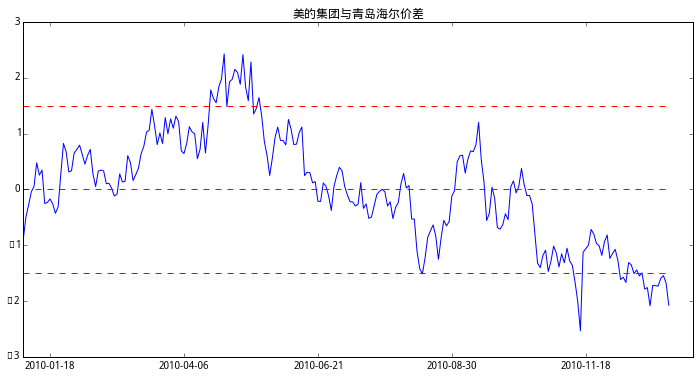

In [15]:
## 绘制价差走势
plt.figure(figsize=(12,6))
plt.plot(st)
plt.plot(arange(len(st)),[1.5 for i in arange(len(st))],'r--')
plt.plot(arange(len(st)),[-1.5 for i in arange(len(st))],'r--')
plt.plot(arange(len(st)),[0 for i in arange(len(st))],'g--')
plt.title('美的集团与青岛海尔价差')
plt.xticks(np.arange(10,len(price['000527.XSHE'].index),50),[str(price['000527.XSHE'].index[i])[:10] for i in np.arange(10,len(price['000527.XSHE'].index),50)])

In [8]:
###交易策略
###当价差达到1.5时做空美的集团，做多青岛海尔，当价差变为0时平仓，当价差达到-1.5时做多美的集团，做空青岛海尔，比例为回归得到的beta值
u=0
meidi=[]
haier=[]
meidinum=0
haiernum=0
for i in arange(1,len(st)):
    if u==0 and st[i]>1.5:
        meidinum=-1##做空美的
        haiernum=-meidinum*slope ##做多海尔
        u=i
    elif u<>0 and st[i]*st[i-1]<0: ##此时价差变0
        meidinum=0
        haiernum=0
        u=0
    elif u==0 and st[i]<-1.5:
        meidinum=1
        haiernum=-meidinum*slope
        u=i
    meidi.append(meidinum)
    haier.append(haiernum)

([<matplotlib.axis.XTick at 0x7f02028fa190>,
 <a list of 5 Text xticklabel objects>)

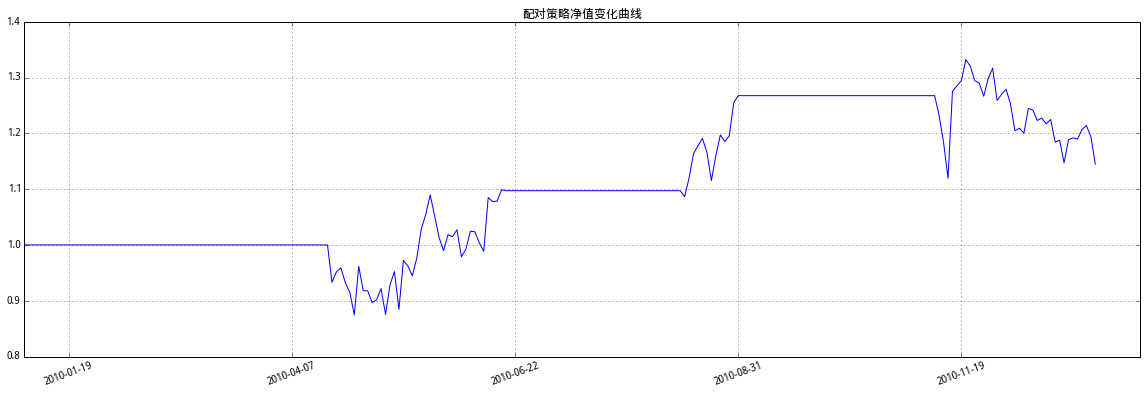

In [11]:
## 绘制上述策略的净值曲线
meidirate=price['000527.XSHE'].diff(1)[1:]/list(price['000527.XSHE'][:-1])
haierrate=price['600690.XSHG'].diff(1)[1:]/list(price['600690.XSHG'][:-1])
sumrate=meidirate*meidi+haierrate*haier
cumrate=[]
tempt=1
for i in arange(len(sumrate)):
    tempt=tempt*(1+sumrate[i])
    cumrate.append(tempt)
plt.figure(figsize=(20,6))
plt.plot(cumrate)
plt.title('配对策略净值变化曲线')
plt.grid(True)
plt.xticks(np.arange(10,len(meidirate.index),50),[str(meidirate.index[i])[:10] for i in np.arange(10,len(meidirate.index),50)],rotation=20)

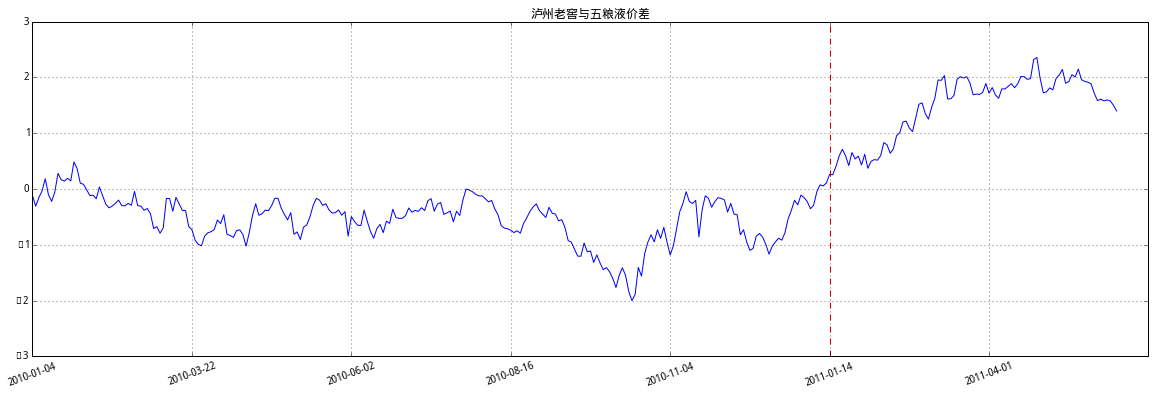

In [12]:
##绘制泸州老窖与五粮液价差走势
test=get_jiacha(securityx='000858.XSHE',securityy='000568.XSHE',start_date='2010-01-01',end_date='2011-06-01')[0]
plt.figure(figsize=(20,6))
plt.plot(test)
plt.plot([250 for i in arange(100)],arange(-50,50)/100.*6.,'r--')
plt.title('泸州老窖与五粮液价差')
plt.xticks(arange(0,len(test),50),[str(test.index[i])[:10] for i in arange(0,len(test),50)],rotation=20)
plt.grid(True)

上图为2010年1月至2011年6月泸州老窖与五粮液价差走势，可以看到，从2011年1月开始，价差呈现单边走势，不再具有均值回归特性，可能是基本面等发生了变化，此时不适合对其进行配对交易。